<a href="https://colab.research.google.com/github/caseyh4/CA4015/blob/main/CA4015_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CA4015 Assignment 1**

**Name:** Harry Casey

**Student Number:** 19438512

**Auto ML and Pycaret**

In this assignment I will be attempting to use an automated machine learning method via PyCaret (an open source machine learning library in Python) to predict whether or not patients in a dataset have diabetes or not. AutoML handles the complete process of applying machine learning to the real world and practical problems such as applying a model to predict whether someone has diabetes or not. In this assignment I will also be using a manual method of using a Random Forest classifier to predict results which is a more traditional and manual method in machine learning.

AutoML reduces many of the steps involved in the likes of these methods that are usually used in machine learning. Some of the steps that are reduced include data processing, data engineering,model selection and hyperparameter tuning which can all be automated when using AutoML. Since all these steps are automated AutoML’s main focus is on the collection and merging of data and the prediction itself.

PyCaret is an example of a library which allows for these steps to be done automatically. This library can be installed and imported into a notebook as you will see in my code. Pycaret provides functions which compares, evaluates and tunes models with a lot less lines of code then what it would take when manually doing these things. This can make projects more efficient and faster. In the results section I will be testing this and comparing the accuracy of results of using AutoML (specifically PyCaret) and not using it (using a Random Forest Classifier).

All the features in PyCaret are stored and once this library is installed you can call the functions which are immediately ready to be used. Using these stored functions I will be able to set up (the setup() function) the diabetes dataset with the target value set as the ‘Outcome’ which is the column name in the dataset to help predict whether or not a patient is diabetic or not. I will then be able to compare a range of the different potential models that could be used to predict results (the compare_models() function). By viewing and comparing the different results we will be able to identify the model with the greatest accuracy and results. From this we can use another function from the PyCaret library to create the model with the best results (create_model() function). Model tuning can also be done using the tune_model() function which will know what hyperparameters to tune automatically.

With all the functions I have mentioned above I will have the option to try different models and to efficiently turn them into even better ones when using this method for predicting whether someone is diabetic or not. This will require to run less lines of code than using the Random Forest method when attempting to predict results.



**The Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../content/diabetes.csv')


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


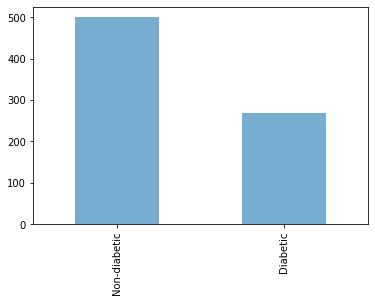

In [5]:
Non_diabetic =  data[ data['Outcome'] == 0 ]
Diabetic = data[ data['Outcome'] == 1 ]

graph = pd.Series({'Non-diabetic':Non_diabetic.shape[0],
            'Diabetic':Diabetic.shape[0]})
graph.plot.bar(alpha=0.6)

In [6]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see above there are outliers with the value of 0 which don't seem to make sense.

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

After checking for null values we can see that there are none. 

Now I will replace 0s with NaN and then replace these null values with median values.

In [8]:
null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']
data[null] = data[null].replace(0, np.NaN)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values = np.NaN, strategy="median")
data[null] = simple_imputer.fit_transform(data[null])

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Random Forest**

Now we split the data to eliminate bias to the training data for the random forest classifier.

In [104]:
X = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
print('Accuracy Score = ',round(accuracy_score(y_test,prediction_rf),2))
print('F1 Score = ',round(f1_score(y_test,prediction_rf),2))
print('Recall Score = ',round(recall_score(y_test,prediction_rf),2))

Accuracy Score =  0.79
F1 Score =  0.64
Recall Score =  0.62


**AutoML method via PyCaret**

In [25]:
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from pycaret.classification import *

I will now use the setup() function to initialize the training enviroment and prepare the data for modelling.

In [27]:
data_setup = setup(data = data, target = 'Outcome')

,Description,Value
0,session_id,1045
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [28]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8027,0.8364,0.6126,0.7637,0.6766,0.5380,0.5468,0.509
lr,Logistic Regression,0.7935,0.8438,0.6067,0.7438,0.6666,0.5194,0.5264,0.629
lda,Linear Discriminant Analysis,0.7805,0.8463,0.5795,0.7272,0.6430,0.4874,0.4956,0.020
ridge,Ridge Classifier,0.7768,0.0000,0.5684,0.7210,0.6336,0.4765,0.4850,0.016
et,Extra Trees Classifier,0.7747,0.8264,0.6073,0.7002,0.6435,0.4816,0.4891,0.461
gbc,Gradient Boosting Classifier,0.7711,0.8370,0.6009,0.6913,0.6389,0.4734,0.4786,0.130
ada,Ada Boost Classifier,0.7691,0.8140,0.5965,0.6877,0.6356,0.4688,0.4737,0.107
lightgbm,Light Gradient Boosting Machine,0.7676,0.8381,0.6132,0.6761,0.6407,0.4701,0.4731,0.121
dt,Decision Tree Classifier,0.7376,0.7030,0.5918,0.6299,0.5991,0.4075,0.4162,0.018
knn,K Neighbors Classifier,0.7320,0.7685,0.5298,0.6287,0.5715,0.3796,0.3847,0.117


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False)

After comparing the models above I have decided I will choose random forest when creating a model it has the highest F1 score.

In [55]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8557,0.6667,0.7059,0.6857,0.5352,0.5357
1,0.8889,0.9336,0.7778,0.8750,0.8235,0.7429,0.7456
2,0.7593,0.7693,0.5556,0.6667,0.6061,0.4348,0.4385
3,0.7963,0.7585,0.5556,0.7692,0.6452,0.5075,0.5207
4,0.7593,0.7955,0.4737,0.7500,0.5806,0.4236,0.4456
5,0.7778,0.8331,0.5789,0.7333,0.6471,0.4882,0.4954
6,0.7778,0.8211,0.6842,0.6842,0.6842,0.5128,0.5128
7,0.7925,0.8754,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.9057,0.8952,0.7778,0.9333,0.8485,0.7808,0.7877


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


I will now use the tune_model() function which will provide optimized values for hyperparameters (the variables controlling the training process). 

This will maximize the podels predictited accuracy.

In [109]:
tuned_model_rf =tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8534,0.8333,0.6522,0.7317,0.5714,0.5826
1,0.8333,0.9244,0.8333,0.7143,0.7692,0.6400,0.6447
2,0.7593,0.8102,0.6667,0.6316,0.6486,0.4658,0.4661
3,0.7037,0.8148,0.6667,0.5455,0.6000,0.3684,0.3731
4,0.7778,0.8075,0.6842,0.6842,0.6842,0.5128,0.5128
5,0.7593,0.8301,0.6316,0.6667,0.6486,0.4658,0.4661
6,0.7407,0.7910,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.8302,0.8810,0.7778,0.7368,0.7568,0.6265,0.6270
8,0.8302,0.9286,0.8333,0.7143,0.7692,0.6362,0.6409


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 23
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


A ROC curve shows true positive rate against the false positive rate for a at a variety of thresholds so I decided to plot this for the random forest classifier.

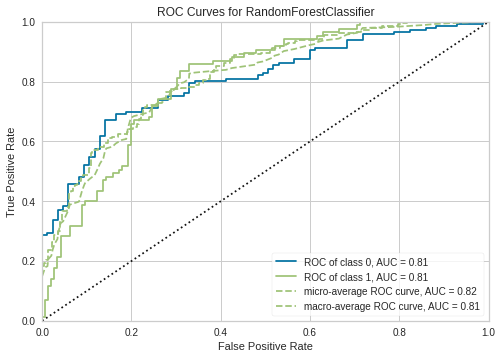

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [117]:
plot_model(tuned_model_rf)

I will now view predictions based on this model.

In [118]:
prediction_rf = predict_model(tuned_model_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7316,0.8051,0.6706,0.6264,0.6477,0.4314,0.432


Since logistic regression had the second highest f1 score when comparing the models I decided to create a model on this to compare.

In [60]:
logreg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8395,0.6667,0.7059,0.6857,0.5352,0.5357
1,0.8148,0.9120,0.6667,0.7500,0.7059,0.5714,0.5735
2,0.7222,0.8056,0.4444,0.6154,0.5161,0.3284,0.3369
3,0.7593,0.7623,0.5556,0.6667,0.6061,0.4348,0.4385
4,0.7593,0.8316,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.8148,0.8241,0.5789,0.8462,0.6875,0.5624,0.5828
6,0.7593,0.8135,0.6316,0.6667,0.6486,0.4658,0.4661
7,0.8491,0.8841,0.6667,0.8571,0.7500,0.6443,0.6547
8,0.8491,0.8984,0.6667,0.8571,0.7500,0.6443,0.6547


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 16
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1045, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [63]:
tuned_model=tune_model(logreg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8395,0.6111,0.6875,0.6471,0.4857,0.4875
1,0.8148,0.9151,0.6667,0.7500,0.7059,0.5714,0.5735
2,0.7222,0.8056,0.4444,0.6154,0.5161,0.3284,0.3369
3,0.7593,0.7639,0.5556,0.6667,0.6061,0.4348,0.4385
4,0.7407,0.8331,0.5263,0.6667,0.5882,0.4028,0.4088
5,0.8148,0.8256,0.5789,0.8462,0.6875,0.5624,0.5828
6,0.7593,0.8135,0.6316,0.6667,0.6486,0.4658,0.4661
7,0.8491,0.8857,0.6667,0.8571,0.7500,0.6443,0.6547
8,0.8491,0.8984,0.6667,0.8571,0.7500,0.6443,0.6547


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 19
INFO:logs:LogisticRegression(C=1.449, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1045, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


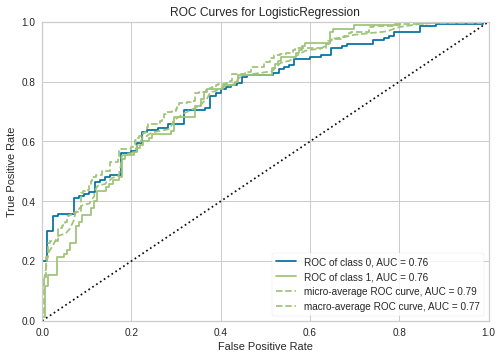

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(tuned_model)

In [65]:
prediction = predict_model(tuned_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.449, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1045, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7013,0.7644,0.4471,0.6333,0.5241,0.3158,0.326


**Comparing and Evaluating results**

The main scores and results I will be focusing on are recall and F1 score. The recall score here measures how many of the true positives (correctly predicted patients are diabetic) we are able to predict and the precision score is true positives divided by true and false positives (incorrectly predicted patients are diabetic when they actually aren't) added together. The F1 score is the harmonic mean of precision and recall. 

The reason I feel the F1 score and the recall score are the most important scores to focus on here is because I believe with this dataset it is easier to get a higher score when focusing on negatives (i.e predicting someone is not diabetic) as there are nearly twice as more non-diabetics in this dataset than diabetics. For this same reason I feel accuracy on its own is not too important when comparing results.

**Random Forest Results**

Below are the results for the random forest classifier used in my first method.

In [132]:
print('Accuracy Score = ',round(accuracy_score(y_test,prediction_rf),4))
print('F1 Score = ',round(f1_score(y_test,prediction_rf),4))
print('Recall Score = ',round(recall_score(y_test,prediction_rf),4))

Accuracy Score =  0.7922
F1 Score =  0.6444
Recall Score =  0.617


Below are the results for the random forest classifier using PyCaret.

In [122]:
prediction_rf = predict_model(tuned_model_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=-1, oob_score=False, random_state=1045, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7316,0.8051,0.6706,0.6264,0.6477,0.4314,0.432


The accuracy is over 6% higher in the original random classifier method which means it got more predictions right than the other. As I mentioned before I feel this isn't too important as a lot of these predictions could have came down to predicting negatives. The recall score is 0.6706 for the AutoML method and is 0.617 for the orginal random classifier method. This means the AutoML method predicted slightly more patients to be diabetic.

As you can see the F1 score is very similar with the AutoML method having only a 0.0033 higher score. Clearly both methods are not far off eachother when measuirng how accurate each of the prediction models are. 

In [121]:
prediction = predict_model(tuned_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.449, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1045, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7013,0.7644,0.4471,0.6333,0.5241,0.3158,0.326


As you can see above the results from the logistic regression model created using PyCaret are not as accurate as the ones returned for the random forest classifier.

Overall, I feel the AutoML method is a lot more efficient and took less time than using a Random Forest Classifier. Both results are similar which I was expecting as random forest is one of the best classifiers there is as it can provide high accuracy by combining many decision trees to predict results. I was extremely impressed with PyCaret and the information it can give you with such little lines of code and that is the main reason I felt this method was a lot more efficient. Being able to compare the range of models and then having the option to predict results from each model is one of the many reasons why AutoML is so beneficial and is why I would use this method over the normal random forest classifier method used in this project.